In [120]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import (
    KMeans,
    AffinityPropagation,
    AgglomerativeClustering,
)  # 亲和力传播和层次聚类

# 1.轮廓系数
# 对于不正确的 clustering （聚类），分数为 -1 ， highly dense clustering （高密度聚类）为 +1 。
# 零点附近的分数表示 overlapping clusters （重叠的聚类）。
# silhouette_score()计算所有点的平均轮廓系数，而silhouette_samples()返回每个点的轮廓系数。
from sklearn.metrics.cluster import silhouette_score, silhouette_samples

# 2.CH分数,结果越大,评估越好
from sklearn.metrics.cluster import calinski_harabasz_score

# 3.戴维森堡丁指数 值最小是0，值越小，代表聚类效果越好
from sklearn.metrics.cluster import davies_bouldin_score

# 4.需要label_ture,结果在0~1之间,越接近1越好
# 返回 homogeneity, completeness, v_measure(Harmonic mean of the first two)
from sklearn.metrics.cluster import homogeneity_completeness_v_measure

import matplotlib.pyplot as plt

# 创建数据集
https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [121]:
n_samples = 1500
blobs_x, blobs_y = datasets.make_blobs(
    n_samples=n_samples, n_features=2, centers=4, random_state=0
)
# 大圆套小圆
circles_x, circles_y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)
# 生成两个半圆
moons_x, moons_y = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=0)

## 展示数据

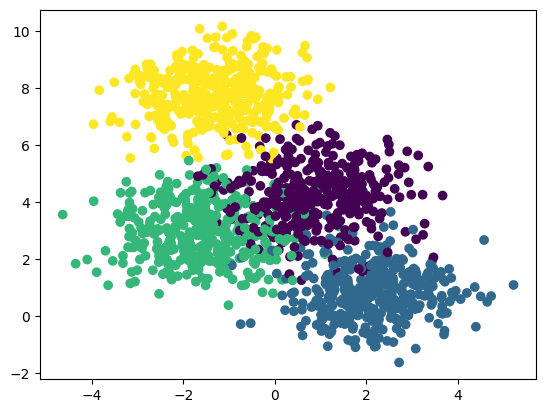

In [122]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=blobs_y)

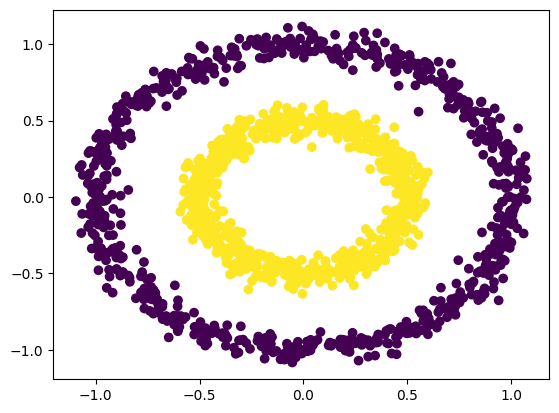

In [123]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=circles_y)

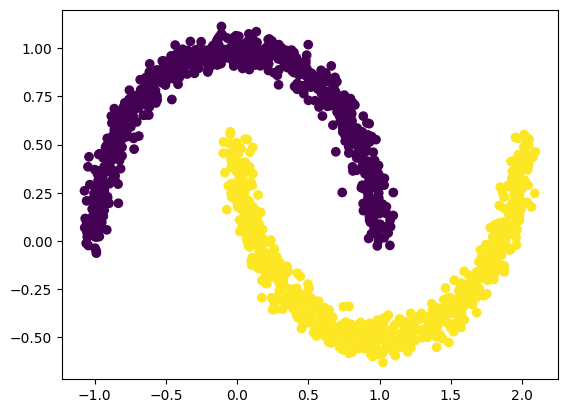

In [124]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=moons_y)

## score得分函数

In [125]:
def get_score(x, y, pred_y: list):
    print("silhouette_score, bigger is better")
    for y_ in pred_y:
        print(silhouette_score(x, y_))
    print()

    print("calinski_harabasz_score, bigger is better")
    for y_ in pred_y:
        print(calinski_harabasz_score(x, y_))
    print()

    print("davies_bouldin_score, smaller is better")
    for y_ in pred_y:
        print(davies_bouldin_score(x, y_))
    print()

    print("homogeneity_completeness_v_measure, bigger is better")
    for y_ in pred_y:
        print(homogeneity_completeness_v_measure(y, y_))

# 聚类

## blobs

### KMeans

In [126]:
#                               4种类别
kmeans_blobs = KMeans(n_clusters=4, random_state=0)

In [127]:
kmeans_blobs_y_pred = kmeans_blobs.fit_predict(blobs_x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


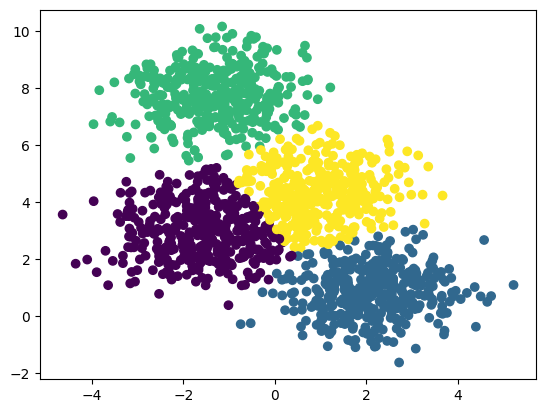

In [128]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=kmeans_blobs_y_pred)

### AffinityPropagation 亲和力传播

主要参数
- damping : 阻尼系数，取值[0.5,1)
- convergence_iter ：比较多少次聚类中心不变之后停止迭代，默认15
- max_iter ：最大迭代次数
- preference :参考度

In [129]:
ap_blobs = AffinityPropagation(damping=0.9, preference=-200)

In [130]:
ap_blobs_y_pred = ap_blobs.fit_predict(blobs_x)

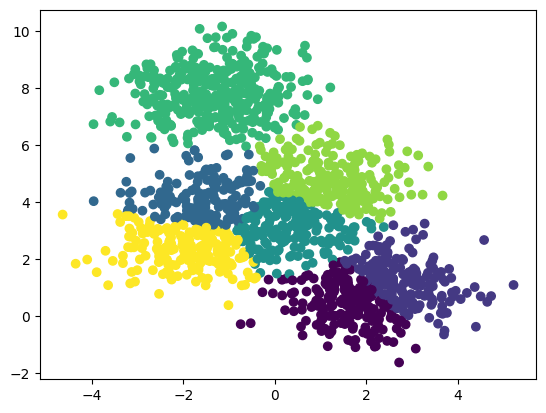

In [131]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=ap_blobs_y_pred)

### AgglomerativeClustering 层次聚类

In [132]:
ac = AgglomerativeClustering(n_clusters=4)

In [133]:
ac_blobs_y_pred = ac.fit_predict(blobs_x)

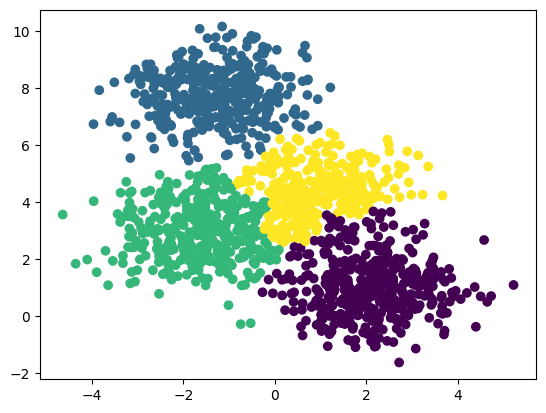

In [134]:
plt.scatter(blobs_x[:, 0], blobs_x[:, 1], c=ac_blobs_y_pred)

### score

In [135]:
get_score(blobs_x, blobs_y, [kmeans_blobs_y_pred, ap_blobs_y_pred, ac_blobs_y_pred])

silhouette_score, bigger is better
0.508614216804456
0.39199251146563197
0.4895455228018272

calinski_harabasz_score, bigger is better
2634.7086515460765
2013.50523145673
2496.8009966699133

davies_bouldin_score, smaller is better
0.6950536918882211
0.9354533929941644
0.6984469325821201

homogeneity_completeness_v_measure, bigger is better
(0.7990860926862009, 0.7993712592378472, 0.7992286505250106)
(0.7911964879362645, 0.5753603612926378, 0.6662336768636312)
(0.7704103231840103, 0.7727760484619862, 0.7715913724788054)


## circles

### KMeans

In [136]:
#                                  2种类别
kmeans_circles = KMeans(n_clusters=2, random_state=0)

In [137]:
kmeans_circles_y_pred = kmeans_circles.fit_predict(circles_x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


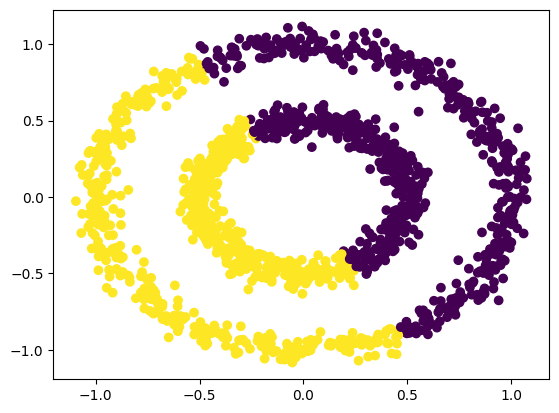

In [138]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=kmeans_circles_y_pred)

### AffinityPropagation 亲和力传播

主要参数
- damping : 阻尼系数，取值[0.5,1)
- convergence_iter ：比较多少次聚类中心不变之后停止迭代，默认15
- max_iter ：最大迭代次数
- preference :参考度

In [147]:
ap_circles = AffinityPropagation(damping=0.77)

In [148]:
ap_circles_y_pred = ap_circles.fit_predict(circles_x)

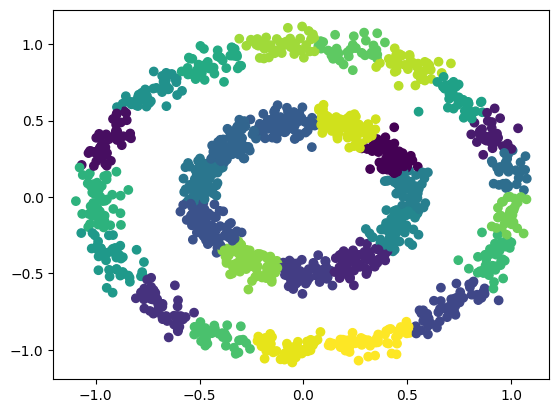

In [149]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=ap_circles_y_pred)

### AgglomerativeClustering 层次聚类

In [150]:
ac_circles = AgglomerativeClustering(n_clusters=2, linkage="single")

In [151]:
ac_circles_y_pred = ac_circles.fit_predict(circles_x)

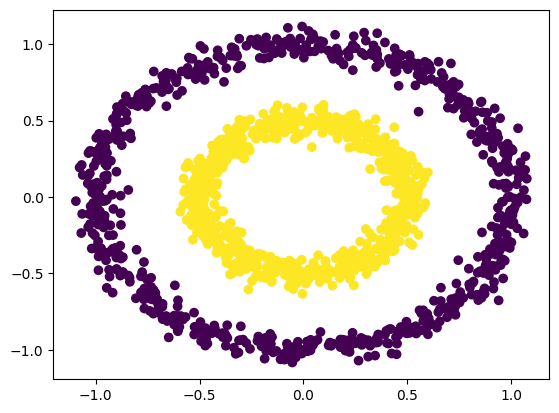

In [152]:
plt.scatter(circles_x[:, 0], circles_x[:, 1], c=ac_circles_y_pred)

### score

In [153]:
get_score(
    circles_x, circles_y, [kmeans_circles_y_pred, ap_circles_y_pred, ac_circles_y_pred]
)

silhouette_score, bigger is better
0.35460052655173707
0.46626702120077895
0.11397816414100963

calinski_harabasz_score, bigger is better
865.4110403299605
3116.6082314062683
0.0013722701365677682

davies_bouldin_score, smaller is better
1.1815946772668477
0.5917944421076896
989.6898942666963

homogeneity_completeness_v_measure, bigger is better
(5.130172150268185e-06, 5.130593243063725e-06, 5.130382688025316e-06)
(1.0, 0.20827857062598537, 0.34475256896773454)
(1.0, 1.0, 1.0)


## moons

### KMeans

In [154]:
#                                  2种类别
kmeans_moons = KMeans(n_clusters=2, random_state=0)

In [155]:
kmeans_moons_y_pred = kmeans_moons.fit_predict(moons_x)

d:\Miniconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


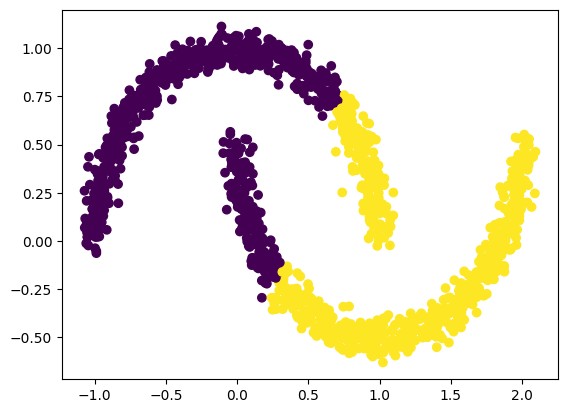

In [156]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=kmeans_moons_y_pred)

### AffinityPropagation 亲和力传播

主要参数
- damping : 阻尼系数，取值[0.5,1)
- convergence_iter ：比较多少次聚类中心不变之后停止迭代，默认15
- max_iter ：最大迭代次数
- preference :参考度

In [163]:
ap_moons = AffinityPropagation(damping=0.75)

In [164]:
ap_moons_y_pred = ap_moons.fit_predict(moons_x)

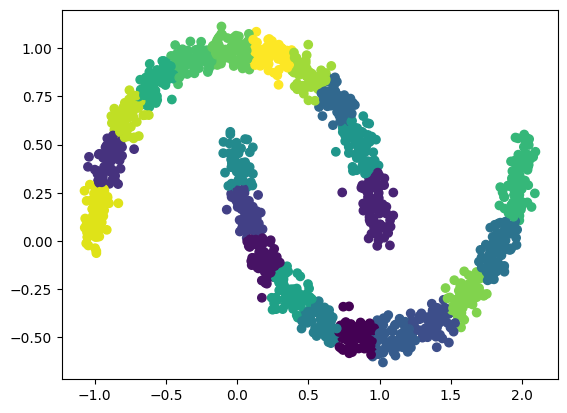

In [165]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=ap_moons_y_pred)

### AgglomerativeClustering 层次聚类

In [166]:
ac_moons = AgglomerativeClustering(n_clusters=2, linkage="average")

In [167]:
ac_moons_y_pred = ac_moons.fit_predict(moons_x)

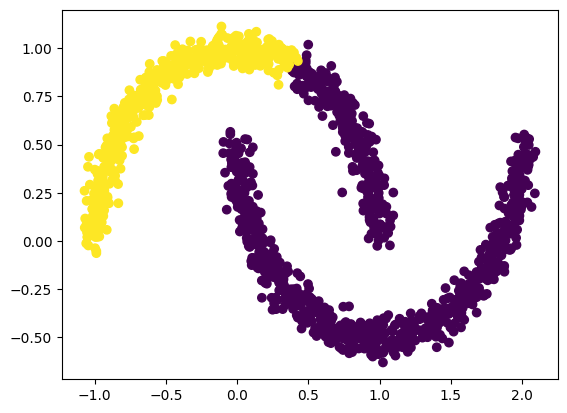

In [168]:
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=ac_moons_y_pred)

### score

In [169]:
get_score(moons_x, moons_y, [kmeans_moons_y_pred, ap_moons_y_pred, ac_moons_y_pred])

silhouette_score, bigger is better
0.491435882702386
0.45757763632551635
0.44663535025860357

calinski_harabasz_score, bigger is better
2226.800466131634
7170.008603706047
1641.2954513507552

davies_bouldin_score, smaller is better
0.7804628942008482
0.6257496348386239
0.7687554509271723

homogeneity_completeness_v_measure, bigger is better
(0.19191420381460828, 0.19191814167293897, 0.19191617272357375)
(0.9999999999999997, 0.2249722397327267, 0.3673099396633066)
(0.42415483341618093, 0.47168447326082047, 0.44665878732886954)
